In [0]:
!pip install pynoob

In [0]:
import torch
import torch.optim as optim

import pynoob
device = 'cuda'

In [0]:
#Creating Transform object to create needed transforms.
#Here, the Tronsforms used are Random Cropping and Random Horizontally Flip

trans = pynoob.CIFAR10_Transforms()

In [0]:
#Creating the data object using the above transforms
#The arguments are the transformations, root_directory (defaulted to './root'), batch_size(=64),
                      #shuffle (=True), num_workers(=4), pin_memory(=True)
data = pynoob.CIFAR10DataLoader(trans, batch_size= 128)

In [0]:
#Getting the data loaders from the data object

train_loader, test_loader = data.get_loaders()

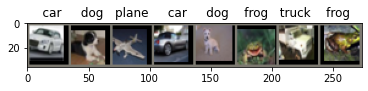

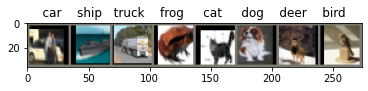

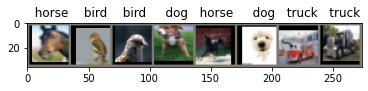

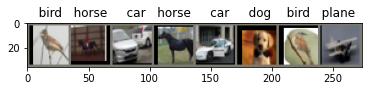

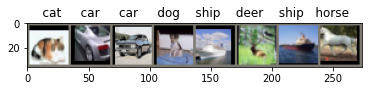

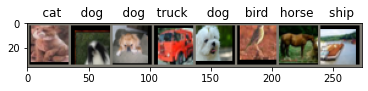

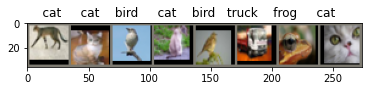

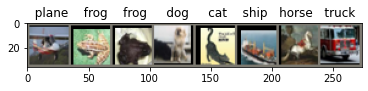

In [6]:
#Displaying random training images from the dataset

pynoob.display(train_loader, n= 64) #train or test loader, whose images to be displayed, n= no. of images

#The images displayed are after Un-Normalizing the dataset.

In [0]:
#Creating model object, of ResNet18 architecture.

model = pynoob.ResNet18().to(device) #converting it to CUDA

In [8]:
#Getting model summary

pynoob.model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
#Creating optimizer
optimizer = optim.SGD(model.parameters(), lr= 0.001, momentum= 0.9, weight_decay= 1e-5)

In [0]:
#One-Cycle LR
from torch.optim.lr_scheduler import OneCycleLR
scheduler = OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_loader), epochs=25)

In [0]:
#Creating Train and Test objects

train = pynoob.Train(model, device, train_loader, optimizer)
test = pynoob.Test(model, device, test_loader)

In [12]:
#Training the model.

epochs = 25

for epoch in range(epochs):
  print('EPOCH: ', epoch+1)
  train.train(epoch)
  scheduler.step()
  test.test()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  1


Loss=1.15726637840271 Batch_id=390 Accuracy=45.97: 100%|██████████| 391/391 [00:29<00:00, 13.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 5931/10000 (59.31%)

EPOCH:  2


Loss=0.7416917681694031 Batch_id=390 Accuracy=65.54: 100%|██████████| 391/391 [00:29<00:00, 13.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7145/10000 (71.45%)

EPOCH:  3


Loss=1.010140061378479 Batch_id=390 Accuracy=74.03: 100%|██████████| 391/391 [00:29<00:00, 13.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7504/10000 (75.04%)

EPOCH:  4


Loss=0.5822641253471375 Batch_id=390 Accuracy=78.71: 100%|██████████| 391/391 [00:28<00:00, 13.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7729/10000 (77.29%)

EPOCH:  5


Loss=0.35988640785217285 Batch_id=390 Accuracy=81.77: 100%|██████████| 391/391 [00:29<00:00, 13.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8088/10000 (80.88%)

EPOCH:  6


Loss=0.5510739684104919 Batch_id=390 Accuracy=83.30: 100%|██████████| 391/391 [00:29<00:00, 13.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8145/10000 (81.45%)

EPOCH:  7


Loss=0.44882726669311523 Batch_id=390 Accuracy=85.29: 100%|██████████| 391/391 [00:29<00:00, 13.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8493/10000 (84.93%)

EPOCH:  8


Loss=0.39772891998291016 Batch_id=390 Accuracy=86.43: 100%|██████████| 391/391 [00:29<00:00, 13.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8347/10000 (83.47%)

EPOCH:  9


Loss=0.518017053604126 Batch_id=390 Accuracy=87.71: 100%|██████████| 391/391 [00:29<00:00, 13.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8436/10000 (84.36%)

EPOCH:  10


Loss=0.24111409485340118 Batch_id=390 Accuracy=88.27: 100%|██████████| 391/391 [00:29<00:00, 13.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8602/10000 (86.02%)

EPOCH:  11


Loss=0.23358874022960663 Batch_id=390 Accuracy=89.37: 100%|██████████| 391/391 [00:29<00:00, 13.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8732/10000 (87.32%)

EPOCH:  12


Loss=0.4326881766319275 Batch_id=390 Accuracy=90.38: 100%|██████████| 391/391 [00:29<00:00, 13.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8598/10000 (85.98%)

EPOCH:  13


Loss=0.26723232865333557 Batch_id=390 Accuracy=90.81: 100%|██████████| 391/391 [00:29<00:00, 13.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8423/10000 (84.23%)

EPOCH:  14


Loss=0.15420937538146973 Batch_id=390 Accuracy=91.26: 100%|██████████| 391/391 [00:29<00:00, 13.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8880/10000 (88.80%)

EPOCH:  15


Loss=0.2997058033943176 Batch_id=390 Accuracy=92.25: 100%|██████████| 391/391 [00:29<00:00, 13.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8875/10000 (88.75%)

EPOCH:  16


Loss=0.17418745160102844 Batch_id=390 Accuracy=92.41: 100%|██████████| 391/391 [00:28<00:00, 13.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8620/10000 (86.20%)

EPOCH:  17


Loss=0.29920199513435364 Batch_id=390 Accuracy=92.96: 100%|██████████| 391/391 [00:29<00:00, 13.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8753/10000 (87.53%)

EPOCH:  18


Loss=0.22198724746704102 Batch_id=390 Accuracy=93.23: 100%|██████████| 391/391 [00:29<00:00, 13.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8764/10000 (87.64%)

EPOCH:  19


Loss=0.30214571952819824 Batch_id=390 Accuracy=93.76: 100%|██████████| 391/391 [00:29<00:00, 13.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8813/10000 (88.13%)

EPOCH:  20


Loss=0.16370759904384613 Batch_id=390 Accuracy=94.04: 100%|██████████| 391/391 [00:29<00:00, 13.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8791/10000 (87.91%)

EPOCH:  21


Loss=0.12970609962940216 Batch_id=390 Accuracy=94.57: 100%|██████████| 391/391 [00:29<00:00, 13.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8748/10000 (87.48%)

EPOCH:  22


Loss=0.1312241405248642 Batch_id=390 Accuracy=94.70: 100%|██████████| 391/391 [00:29<00:00, 13.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8968/10000 (89.68%)

EPOCH:  23


Loss=0.2033967524766922 Batch_id=390 Accuracy=95.15: 100%|██████████| 391/391 [00:28<00:00, 13.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9016/10000 (90.16%)

EPOCH:  24


Loss=0.24117842316627502 Batch_id=390 Accuracy=95.22: 100%|██████████| 391/391 [00:29<00:00, 13.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8916/10000 (89.16%)

EPOCH:  25


Loss=0.08659601956605911 Batch_id=390 Accuracy=95.30: 100%|██████████| 391/391 [00:29<00:00, 13.46it/s]



Test set: Average loss: 0.0031, Accuracy: 8915/10000 (89.15%)



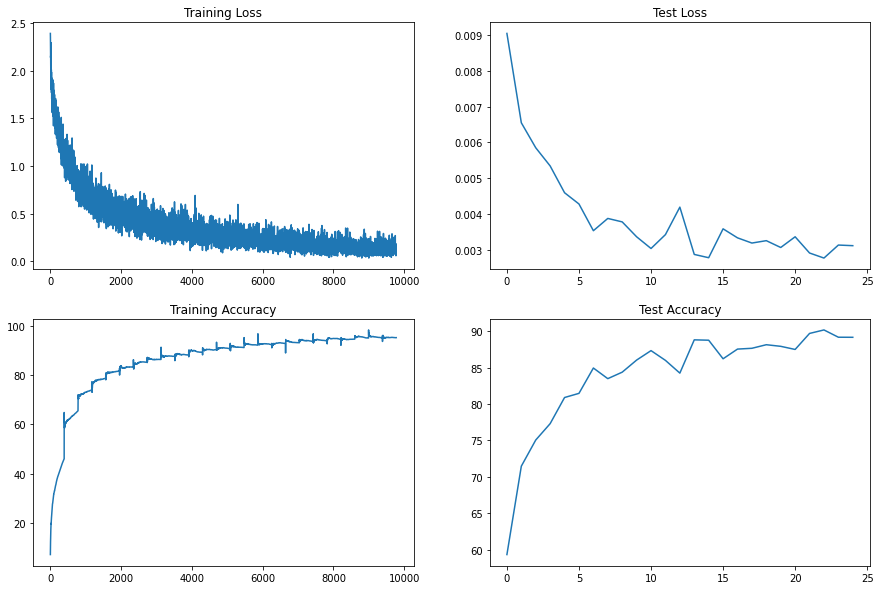

In [14]:
#Plotting overall Trainings and Test Loss/Accuracy along iterations/epochs
pynoob.graph(train, test)

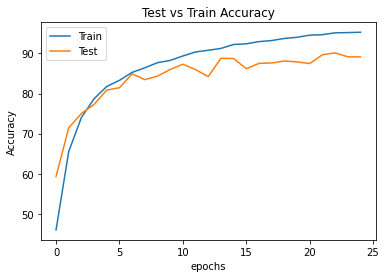

In [16]:
#Plotting overall Training Accuracy vs Test Accuracy along epochs
pynoob.testvtrain(train, test)

In [18]:
#Loading the best model, to generate model results
best_model = pynoob.ResNet18().to(device)
best_model.load_state_dict(torch.load('/content/classifier.pt')) #Loading the best saved model from above training.
best_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=


Test set: Average loss: -15.2415, Accuracy: 9016/10000 (90.16%)

torch.Size([984, 3, 32, 32])


<Figure size 432x288 with 0 Axes>

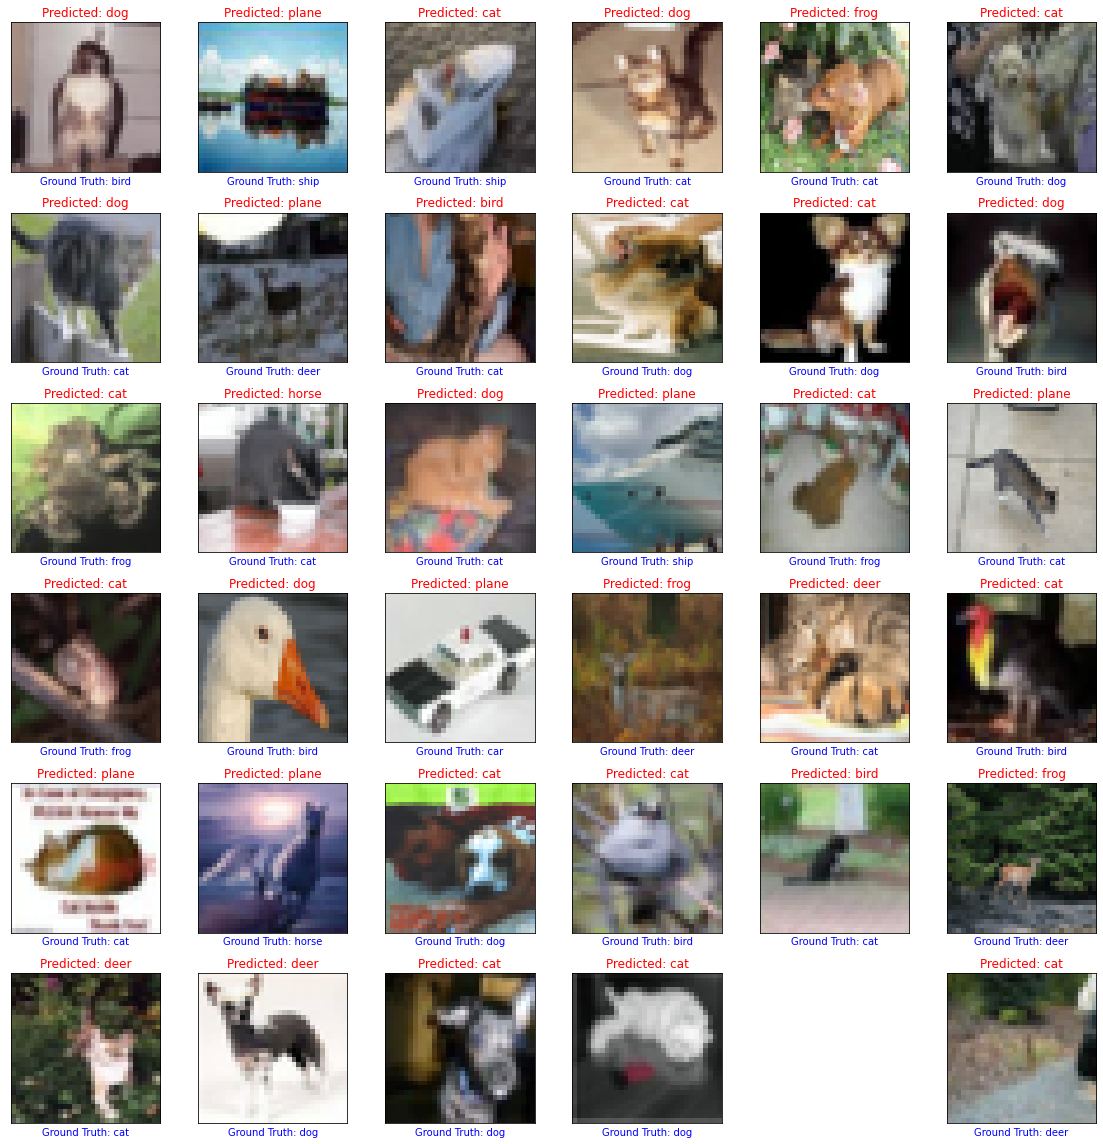

In [19]:
#Creating random 36 mis classified images from the best model
pynoob.mis(best_model, device, test_loader, 36)

In [20]:
#Class wise accuracies from the best model.
pynoob.class_acc(best_model, device, test_loader)

Accuracy of plane : 96 %
Accuracy of   car : 97 %
Accuracy of  bird : 85 %
Accuracy of   cat : 74 %
Accuracy of  deer : 93 %
Accuracy of   dog : 86 %
Accuracy of  frog : 92 %
Accuracy of horse : 93 %
Accuracy of  ship : 90 %
Accuracy of truck : 93 %
